# Origen de la vida

Datos basados en:
* [Life Before Earth](https://arxiv.org/pdf/1304.3381.pdf)
* [Genome increase as a clock for the origin and evolution of life](https://biologydirect.biomedcentral.com/track/pdf/10.1186/1745-6150-1-17?site=biologydirect.biomedcentral.com)


La siguiente tabla muestra la complejidad de ADN, eliminando las redundancias, de diferentes grupos de animales y su aparición en la tierra:

| especies | genoma completo | genoma sin redundancia | aparición |
| - | - | - | - |
| mamíferos | $3.2 · 10^9$pb | $4.8 · 10^8$pb | 125 ma |
| peces     | $4.8 · 10^8$pb | $1.6 · 10^8$pb | 500 ma |
| gusanos   | $9.7 · 10^7$pb | $7.2 · 10^7$pb | 1000ma |
| eucariotas| $2.9 · 10^6$pb | $2.9 · 10^6$pb | 2100ma |
| procariotas|$5 · 10^5$pb   | $5 · 10^5$pb   | 3500ma |


Las columnas significan:
* especies: especies de animales.
* genoma completo: Longitud del genoma de una especie medido en pares de bases de ADN.
* genoma completo: Longitud del genoma de una especie, eliminando la redundancia, medido en pares de bases de ADN.
* aparición: Cuando ese conjunto de especies aparecieron.

Con estos datos tratar de obtener una regresión que indique cuando apareció un organismo con solo 1 par de bases genéticas. Esto podría marcar el origen de la vida.

¿Qué columna habría que coger para hacer la regresión la del genoma completo o el que elimina la redundancia?

Ayuda: Es mejor usar escalas logarítmicas.

In [2]:
df<-data.frame(especie=c("mamíferos","peces","gusanos","eucariotas","procariotas"),
           gen_total=c(3.2e9,4.8e8,9.7e7,2.9e6,5e5),
          gen_reduc=c(4.8e8,1.6e8,7.2e7,2.9e6,5e5),
          aparicion=c(-125,-500,-1000,-2100,-3550))
head(df)

especie,gen_total,gen_reduc,aparicion
mamíferos,3.2e+09,4.8e+08,-125
peces,4.8e+08,1.6e+08,-500
gusanos,9.7e+07,7.2e+07,-1000
eucariotas,2.9e+06,2.9e+06,-2100
procariotas,5.0e+05,5.0e+05,-3550


especie,aparicion,variable,value
mamíferos,-125,gen_total,3.2e+09
peces,-500,gen_total,4.8e+08
gusanos,-1000,gen_total,9.7e+07
eucariotas,-2100,gen_total,2.9e+06
procariotas,-3550,gen_total,5.0e+05
mamíferos,-125,gen_reduc,4.8e+08


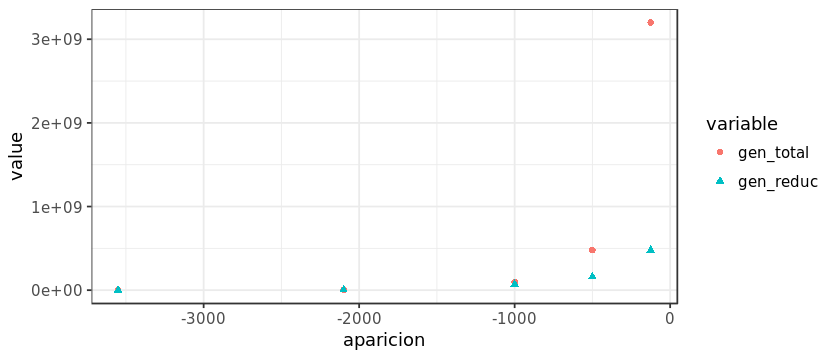

In [3]:
library(ggplot2)
library(reshape2)

options(repr.plot.height=3,repr.plot.width=7)
dfm<-melt(df,id=c("especie","aparicion"))
head(dfm)
ggplot(data=dfm,aes(x=aparicion,y=value))+geom_point(aes(shape=variable,color=variable))+theme_bw()

especie,gen_total,gen_reduc,aparicion
mamíferos,9.505150,8.681241,-125
peces,8.681241,8.204120,-500
gusanos,7.986772,7.857332,-1000
eucariotas,6.462398,6.462398,-2100
procariotas,5.698970,5.698970,-3550


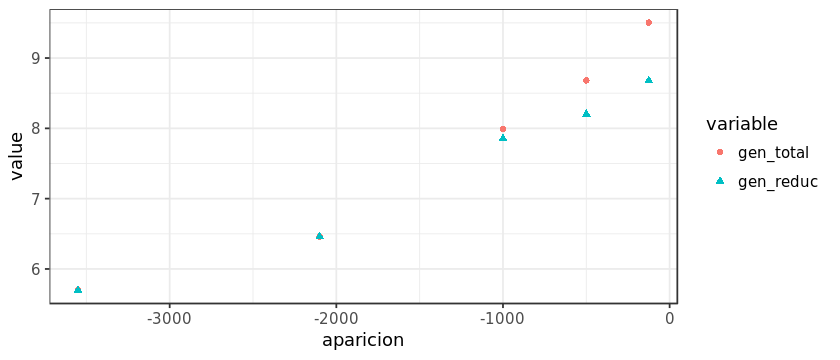

In [87]:
dflog<-df
dflog[,2:3]<- log10(dflog[,2:3])
#dflog[,4]<- -log10(-dflog[,4])
dflog

dfm<-melt(dflog,id=c("especie","aparicion"))

options(repr.plot.height=3,repr.plot.width=7)

ggplot(data=dfm,aes(x=aparicion,y=value))+geom_point(aes(shape=variable,color=variable))+theme_bw()

In [88]:
model_total<-lm(data = dflog, formula = gen_total ~ aparicion)
model_reduc<-lm(data = dflog, formula = gen_reduc ~ aparicion)

summary(model_total)
summary(model_reduc)


Call:
lm(formula = gen_total ~ aparicion, data = dflog)

Residuals:
       1        2        3        4        5 
 0.37584 -0.03573 -0.18043 -0.49530  0.33562 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.266749   0.290574  31.891 6.78e-05 ***
aparicion   0.001099   0.000152   7.235  0.00545 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4215 on 3 degrees of freedom
Multiple R-squared:  0.9458,	Adjusted R-squared:  0.9277 
F-statistic: 52.35 on 1 and 3 DF,  p-value: 0.005446



Call:
lm(formula = gen_reduc ~ aparicion, data = dflog)

Residuals:
       1        2        3        4        5 
 0.11643 -0.02685  0.07147 -0.34422  0.18317 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.676e+00  1.648e-01   52.65 1.51e-05 ***
aparicion   8.902e-04  8.618e-05   10.33  0.00194 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.239 on 3 degrees of freedom
Multiple R-squared:  0.9727,	Adjusted R-squared:  0.9635 
F-statistic: 106.7 on 1 and 3 DF,  p-value: 0.001936


In [89]:
inverse.linear.model<-function(y,model){
    # y = coef[1] + coef[2]*x
    # x = (y - coef[1])/coef[2]    
    coef<-model_reduc$coefficients
    (y - coef[1])/coef[2]
}
paste("El origen de la vida podía haber ocurrido hace",round(abs(inverse.linear.model(0,model_reduc))),
      "millones de años")


[1] "El origen de la vida podía haber ocurrido hace 9746 millones de años"

## Cartera de acciones

Utilizando el paquete *quantmod* nos bajaremos el valor de las acciones de Telefónica (TEF.MC) y BBVA (BBVA.MC) desde 2017-01-01 hasta 2018-01-01.

Tareas:

1- Calcular el logaritmo del retorno de inversión respecto al cierre de la acción del día anterior:
\\[
\text{retorno_dia}_i=\frac{Close.Adjusted[i]}{Close.Adjusted[i-1]}
\\]
Trabajar con:
\\[
R_i=log(\text{retorno_dia}_i)
\\]

2- Crear un dataframe con dos columnas para almacenar el $R_i$ de las dos acciones

3- Calcular la media de este data frame por columnas (se puede usar la función colMeans)

4- Calcular la matriz de covarianza de este data frame

5- Simulamos varios porforlios formados por las dos acciones. Utilizaremos la variable p para indicar el ratio de accioens que habrá de Telefónica, a su vez (1-p) será el ratio de acciones de BBVA de nuestro portfolio.

La media de retorno del portfolio será:
\\[
retorno = p·\mu_{Telefonica}+(1-p)·\mu_{BBVA}
\\]
donde $\mu_{Telefonica}$ y $\mu_{BBVA}$ son las medias que hemos obtenido en el punto 3.

La varianza del portfolio será:
\\[
varianza = p^2·\sigma^2_{Telefonica}+(1-p)^2·\sigma^2_{BBVA}+2·p·(1-p)·\sigma^2_{BBVA,Telefonica}
\\]
donde $\sigma_ij$ es el elemento correspondiente de la matriz de covarianza.

Se hace un barrido de p con 1000 puntos entre 0 y 1.

6 - Pintar en una gráfica el retorno vs varianza para los diferentes valore de p (se puede usar ggplot con geom_path).


In [1]:
suppressWarnings(require("quantmod"))
start <- as.Date("2017-01-01")
end <- as.Date("2018-01-01")

TEF<-getSymbols("TEF.MC", src = "yahoo", from = start, to = end,auto.assign = F)
BBVA<-getSymbols("BBVA.MC", src = "yahoo", from = start, to = end,auto.assign = F)

Loading required package: quantmod
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Please see the Warning section of ‘?getSymbols.yahoo’ for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


In [2]:
portfolio<-merge(TEF[,6],BBVA[,6])

days<-2
seq1<-1:(nrow(portfolio)-days+1)
seq2<-days:nrow(portfolio)
df_return<-data.frame(date=index(portfolio[seq2,]),
                      TEF=coredata(portfolio[seq2,1])/coredata(portfolio[seq1,1]),
                      BBVA=coredata(portfolio[seq2,2])/coredata(portfolio[seq1,2]))
df_return[,2]<-log(df_return[,2])
df_return[,3]<-log(df_return[,3])

date,variable,value
2017-01-03,TEF.MC.Adjusted,0.009670463
2017-01-04,TEF.MC.Adjusted,0.001900784
2017-01-05,TEF.MC.Adjusted,0.020999848
2017-01-06,TEF.MC.Adjusted,0.005671173
2017-01-09,TEF.MC.Adjusted,-0.002068311
2017-01-10,TEF.MC.Adjusted,0.001306867


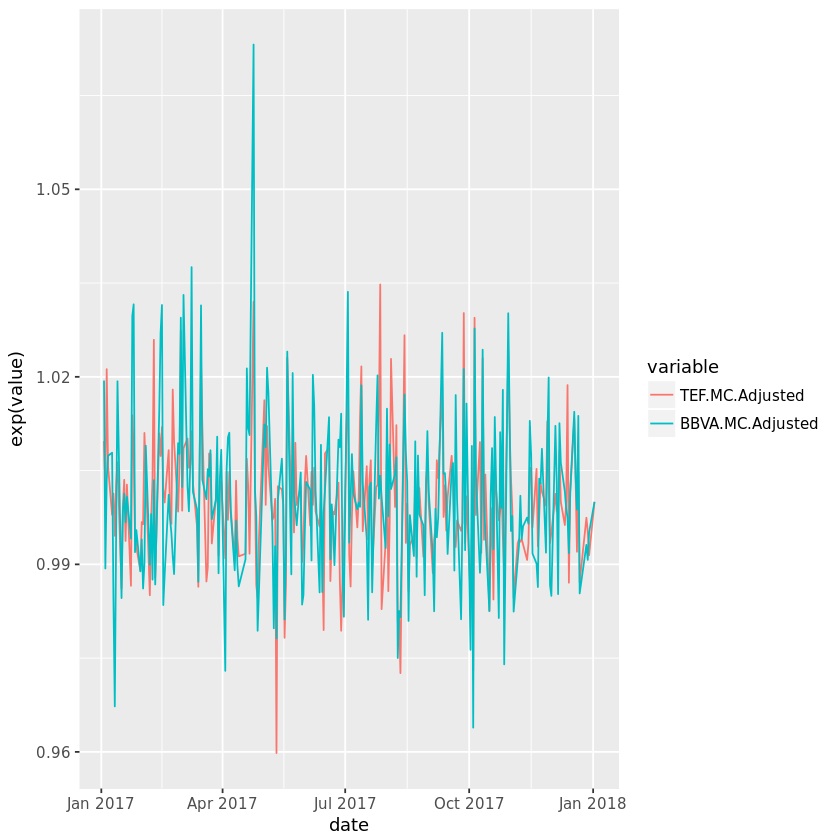

In [19]:
library(reshape2)
dfm<-melt(df_return,id="date")
head(dfm)
ggplot(data=dfm,aes(x=date,y=exp(value),color=variable))+geom_line()

In [4]:
cv<-cov(df_return[,2:3],use = "complete.obs")
cv

,TEF.MC.Adjusted,BBVA.MC.Adjusted
TEF.MC.Adjusted,1.130463e-04,9.390868e-05
BBVA.MC.Adjusted,9.390868e-05,1.835806e-04


In [5]:
m<-colMeans(df_return[,2:3],na.rm=T)
m

TEF.MC.Adjusted BBVA.MC.Adjusted 
   -6.928621e-05     6.050368e-04

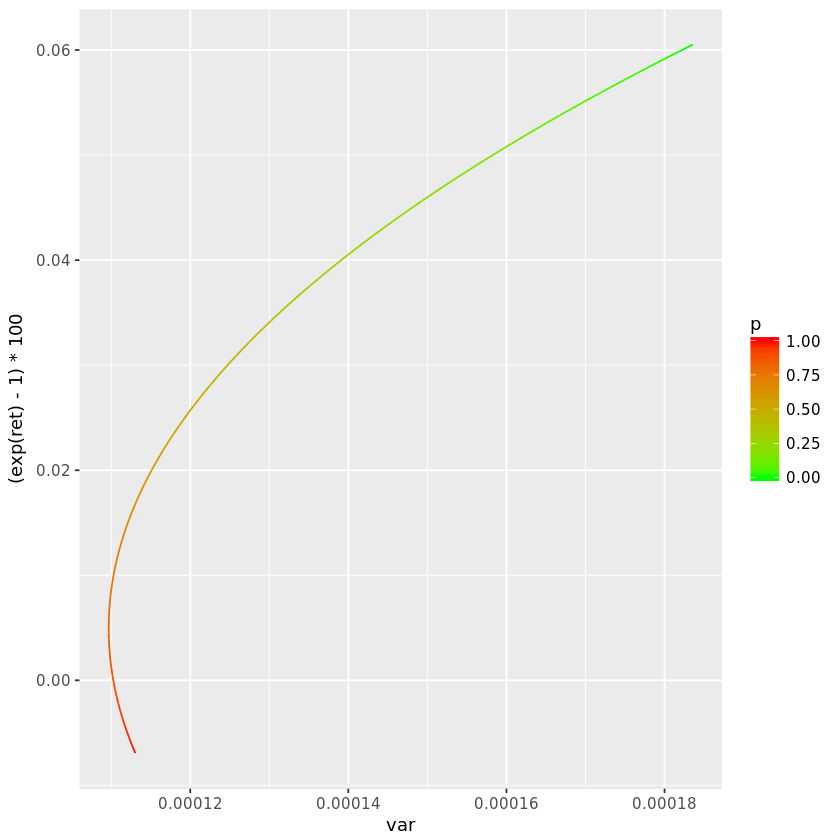

In [7]:
p<-seq(0,1,by=0.01)
total_return<-p*m[1]+(1-p)*m[2]

total_var<-p^2*cv[1,1]+(1-p)^2*cv[2,2]+2*p*(1-p)*cv[1,2]
#total_var<-c()
#for (i in 1:length(p)){
#    total_var<-c(total_var,var( p[i]*df_return[,2]+(1-p[i])*df_return[,3],na.rm=T ))
#}

df<-data.frame(var=total_var,ret=total_return,p=p)
library(ggplot2)
ggplot(data=df,aes(x=var,y=(exp(ret)-1)*100,color=p))+
 geom_path()+scale_color_continuous(low="green",high="red") 



In [50]:
tvar<-function(p){
    total_var<-p^2*cv[1,1]+(1-p)^2*cv[2,2]+2*p*(1-p)*cv[1,2]
    total_var
}
o<-optimize(tvar,c(0,1))
p<-o$minimum
total_return<-exp(p*m[1]+(1-p)*m[2])-1
paste("El valor de p para tener una menor varianza es:",round(p,3))
paste("El retorno medio diario es:",round(total_return,7))
paste0("El retorno medio anual es: ",round((1+total_return)^nrow(df_return),7),"%")

[1] "El valor de p para tener una menor varianza es: 0.824"

[1] "El retorno medio diario es: 4.93e-05"

[1] "El retorno medio anual es: 1.0126547%"